In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
velocityx_data = pd.read_csv(file_path)




In [3]:
print("First few rows of the dataset:")
print(velocityx_data.head())

First few rows of the dataset:
  User ID  Fan Challenges Completed  Predictive Accuracy (%)  \
0    U001                         5                       80   
1    U002                         8                       60   
2    U003                         3                       90   
3    U004                         7                       70   
4    U005                         2                       50   

   Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
0                              3                                    10   
1                              1                                     8   
2                              0                                     6   
3                              2                                    15   
4                              5                                     3   

   Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
0                      120                                       20  

In [4]:
# Checking for any missing values 
missing_values = velocityx_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
User ID                                    0
Fan Challenges Completed                   0
Predictive Accuracy (%)                    0
Virtual Merchandise Purchases              0
Sponsorship Interactions (Ad Clicks)       0
Time on Live 360 (mins)                    0
Real-Time Chat Activity (Messages Sent)    0
dtype: int64


In [7]:
# Calculating the correlation matrix using only numeric columns
correlation_matrix = velocityx_data.select_dtypes(include='number').corr()
correlation_matrix #display


,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
Fan Challenges Completed,1.000000,-0.105757,0.159378,-0.065239,0.002900,0.008089
Predictive Accuracy (%),-0.105757,1.000000,0.022194,0.056612,0.125427,0.024295
Virtual Merchandise Purchases,0.159378,0.022194,1.000000,0.070550,-0.007527,-0.044676
Sponsorship Interactions (Ad Clicks),-0.065239,0.056612,0.070550,1.000000,-0.073929,0.191292
Time on Live 360 (mins),0.002900,0.125427,-0.007527,-0.073929,1.000000,0.050714
Real-Time Chat Activity (Messages Sent),0.008089,0.024295,-0.044676,0.191292,0.050714,1.000000


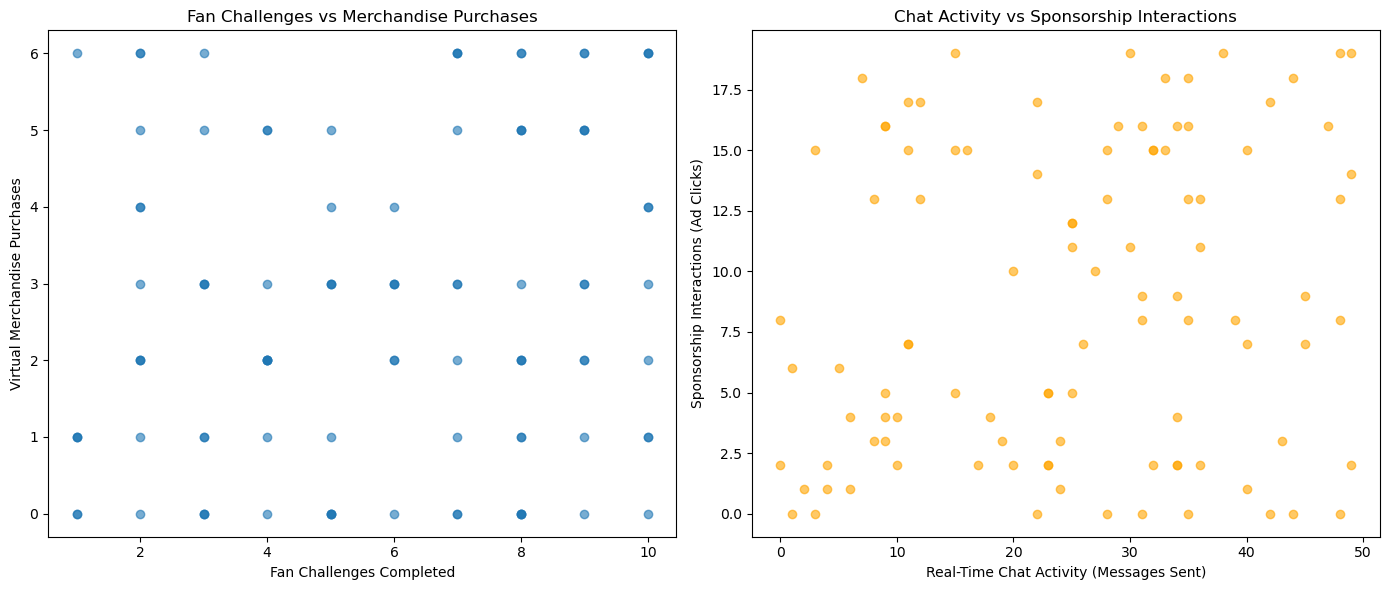

In [8]:

plt.figure(figsize=(14, 6))

# Scatter plot: Fan Challenges Completed vs Virtual Merchandise Purchases
plt.subplot(1, 2, 1)
plt.scatter(velocityx_data['Fan Challenges Completed'], velocityx_data['Virtual Merchandise Purchases'], alpha=0.6)
plt.title('Fan Challenges vs Merchandise Purchases')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Virtual Merchandise Purchases')

# Scatter plot: Real-Time Chat Activity vs Sponsorship Interactions
plt.subplot(1, 2, 2)
plt.scatter(velocityx_data['Real-Time Chat Activity (Messages Sent)'], velocityx_data['Sponsorship Interactions (Ad Clicks)'], alpha=0.6, color='orange')
plt.title('Chat Activity vs Sponsorship Interactions')
plt.xlabel('Real-Time Chat Activity (Messages Sent)')
plt.ylabel('Sponsorship Interactions (Ad Clicks)')

plt.tight_layout()
plt.show()

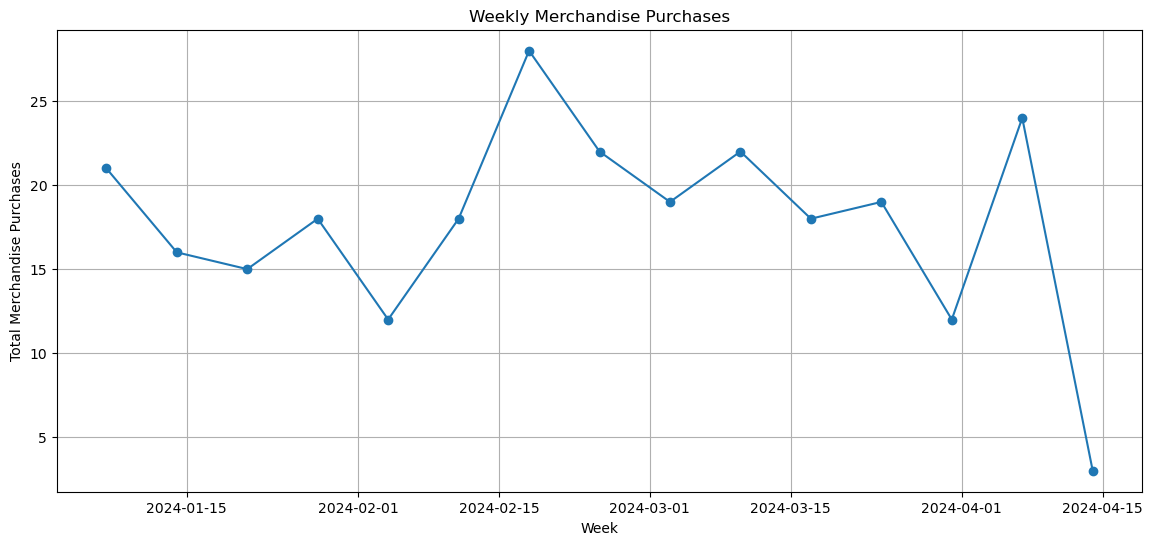

In [12]:

import numpy as np
velocityx_data['Date'] = pd.date_range(start='2024-01-01', periods=len(velocityx_data), freq='D')
weekly_data = velocityx_data.set_index('Date').resample('W').sum()

# Plot the line graph for weekly merchandise purchases
plt.figure(figsize=(14, 6))
plt.plot(weekly_data.index, weekly_data['Virtual Merchandise Purchases'], marker='o', linestyle='-')
plt.title('Weekly Merchandise Purchases')
plt.xlabel('Week')
plt.ylabel('Total Merchandise Purchases')
plt.grid()
plt.show()



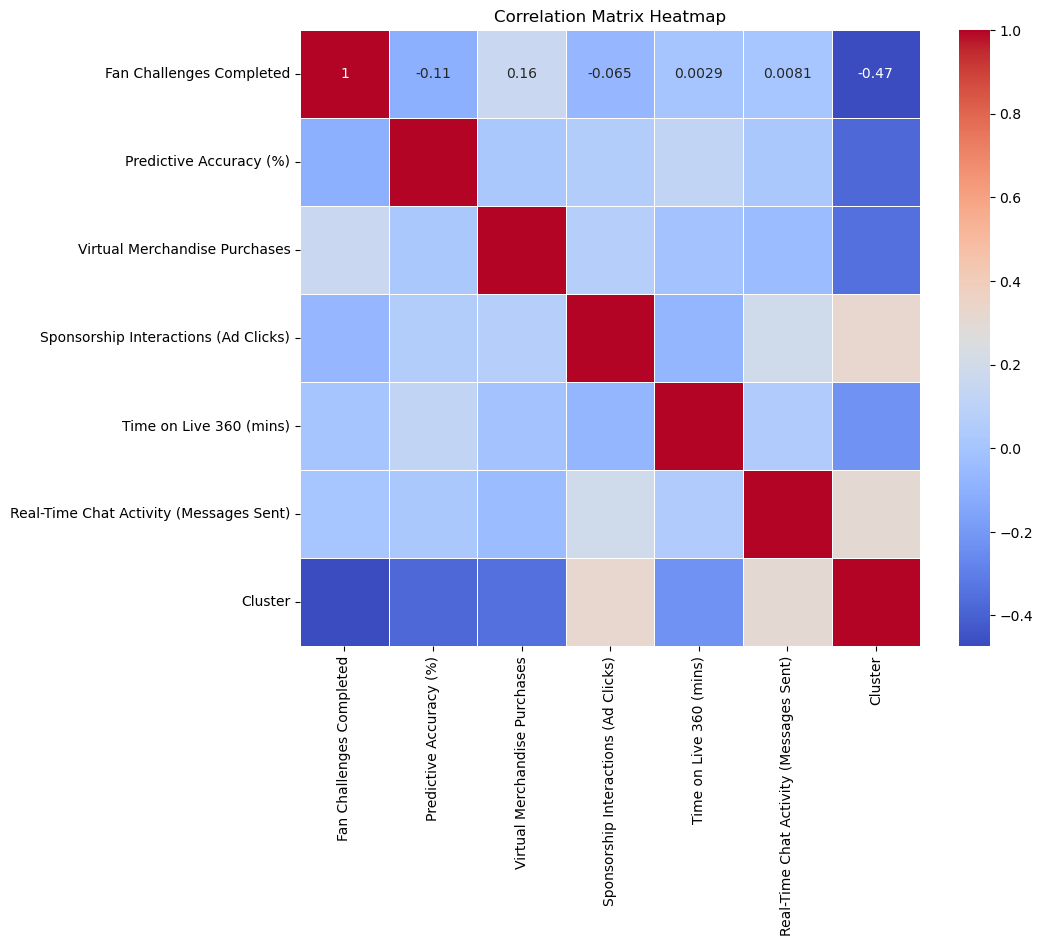

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = velocityx_data.select_dtypes(include='number').corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


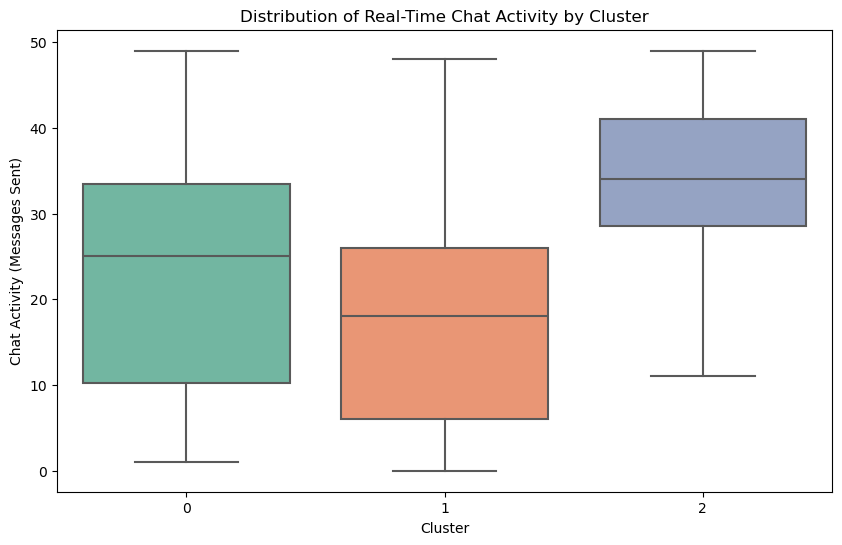

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Real-Time Chat Activity (Messages Sent)', data=velocityx_data, palette='Set2')
plt.title('Distribution of Real-Time Chat Activity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Chat Activity (Messages Sent)')
plt.show()

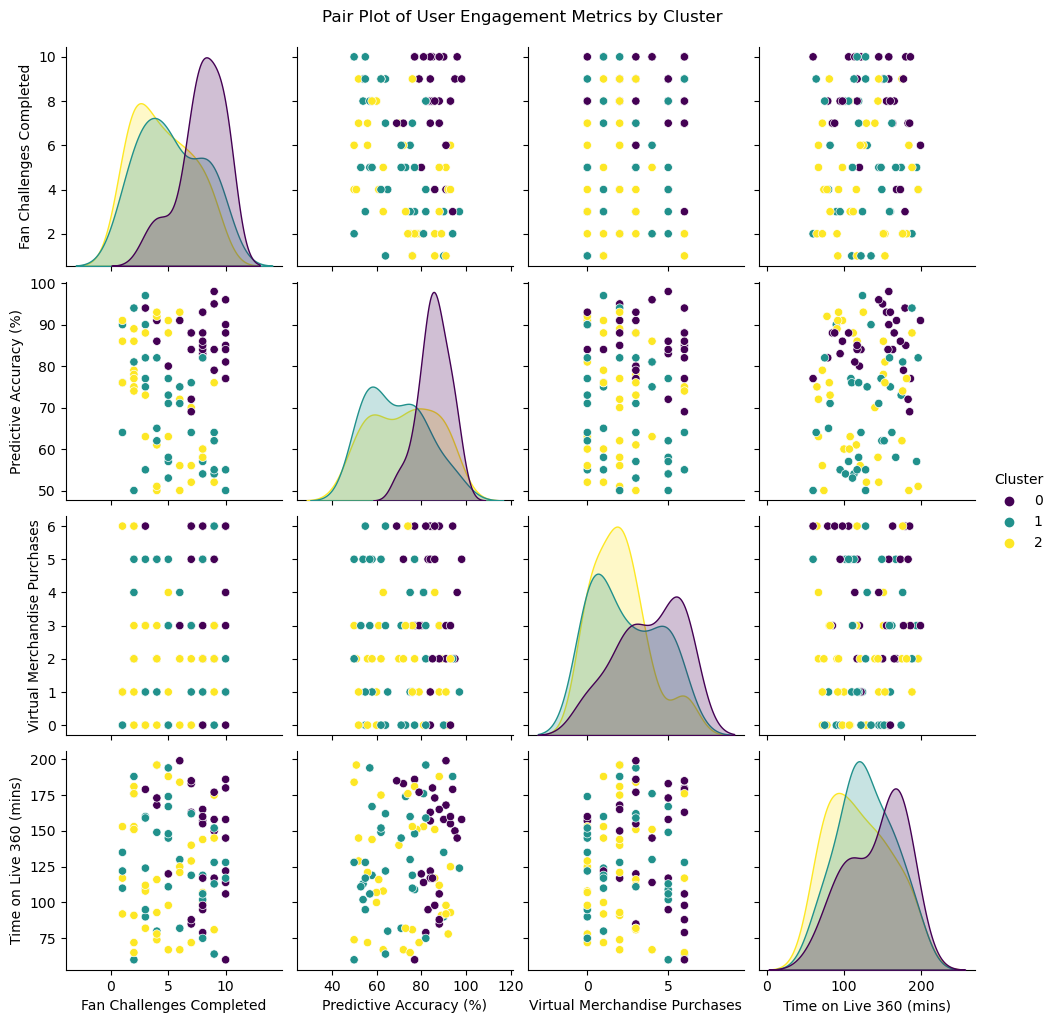

In [19]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

# Pair plot for selected features
sns.pairplot(velocityx_data, vars=["Fan Challenges Completed", "Predictive Accuracy (%)",
                                   "Virtual Merchandise Purchases", "Time on Live 360 (mins)"],
             hue='Cluster', palette='viridis')
plt.suptitle('Pair Plot of User Engagement Metrics by Cluster', y=1.02)
plt.show()


warnings.filterwarnings("default")


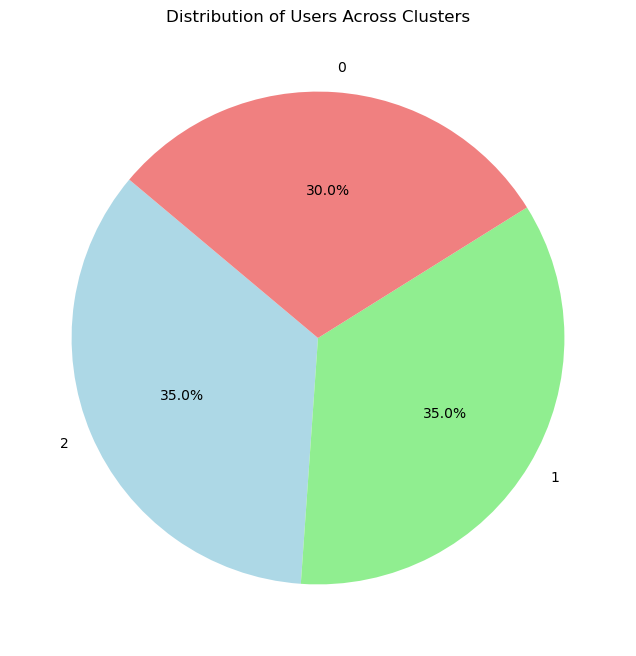

In [18]:
cluster_counts = velocityx_data['Cluster'].value_counts()

# Plot a pie chart for the distribution of users across clusters
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Users Across Clusters')
plt.show()
